<a href="https://colab.research.google.com/github/priyarajmohan/ML_projects/blob/main/Unsupervised_PCA_messy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import setns
import pandas as pd
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
messy = pd.read_csv('/content/customer_data.csv')

In [ ]:
messy

,customer_id,age,gender,city,email
0,C000001,61,Other,Lisbon,user1@example.com
1,C000002,61,Female,Coimbra,user2@example.com
2,C000003,22,Female,Faro,user3@example.com
3,C000004,46,Other,Lisbon,NaN
4,C000005,47,Other,Faro,user5@example.com
...,...,...,...,...,...
24995,C024996,51,Male,Lisbon,user24996@example.com
24996,C024997,62,Other,Lisbon,user24997@example.com
24997,C024998,25,Male,Porto,user24998@example.com
24998,C024999,27,Other,Braga,user24999@example.com


In [ ]:
messy.isnull().sum()

,0
customer_id,0
age,0
gender,0
city,0
email,496


In [ ]:
messy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  25000 non-null  object
 1   age          25000 non-null  int64 
 2   gender       25000 non-null  object
 3   city         25000 non-null  object
 4   email        24504 non-null  object
dtypes: int64(1), object(4)
memory usage: 976.7+ KB


In [ ]:
messy['email'] = messy['email'].fillna('unknown')

In [ ]:
messy.isnull().sum()

,0
customer_id,0
age,0
gender,0
city,0
email,0


In [ ]:
messy.duplicated().sum()

np.int64(0)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
for i in messy.select_dtypes(include=['object']).columns:
  messy[i] =le.fit_transform(messy[i])

In [ ]:
messy

,customer_id,age,gender,city,email
0,0,61,3,3,10884
1,1,61,1,1,16879
2,2,22,1,2,17972
3,3,46,3,3,0
4,4,47,3,2,20145
...,...,...,...,...,...
24995,24995,51,2,3,16335
24996,24996,62,3,3,16336
24997,24997,25,2,4,16337
24998,24998,27,3,0,16338


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
for i in messy.columns:
  messy[i] = sc.fit_transform(messy[[i]])

In [ ]:
messy

,customer_id,age,gender,city,email
0,-1.731982,1.191337,1.215095,0.717947,-0.156121
1,-1.731843,1.191337,-1.172032,-0.704745,0.675526
2,-1.731704,-1.314884,-1.172032,0.006601,0.827150
3,-1.731566,0.227406,1.215095,0.717947,-1.665986
4,-1.731427,0.291668,1.215095,0.006601,1.128596
...,...,...,...,...,...
24995,1.731427,0.548716,0.021532,0.717947,0.600060
24996,1.731566,1.255599,1.215095,0.717947,0.600199
24997,1.731704,-1.122098,0.021532,1.429293,0.600338
24998,1.731843,-0.993574,1.215095,-1.416090,0.600476


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x_pca = pca.fit_transform(messy)
x_pca

array([[ 1.16732043, -0.73643283],
       [ 1.72016149, -0.3160067 ],
       [ 1.72439476,  1.45467602],
       ...,
       [-0.87837487,  1.41508817],
       [-0.74277442, -1.15233965],
       [-0.7272822 , -1.39685306]])

In [ ]:
z = linkage(x_pca,method = 'ward')

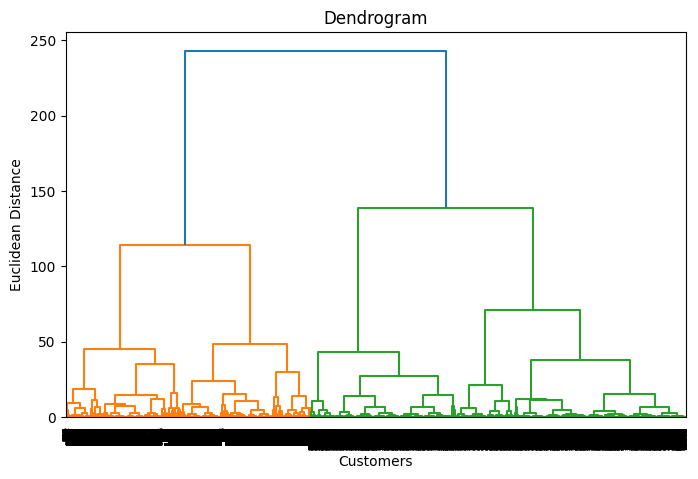

In [ ]:
plt.figure(figsize = (8,5))
dendrogram(z)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

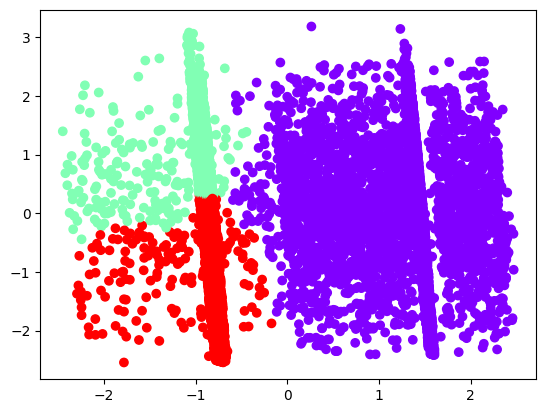

In [ ]:
clusters = fcluster(z,t = 3,criterion = 'maxclust')
plt.scatter(x_pca[:,0],x_pca[:,1],c = clusters,cmap = 'rainbow')